# Machine Learning (ML) Task 1.2 Dataset scaling

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Verify import results, data wrangling

#### 03. Data scaling (z-score method)

#### 04. Export scaled subset dataframe

### 01. Import libraries and datasets

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler

In [15]:
path = r'C:\Users\dirk8\CareerFoundry\07-2025 Machine Learning With Python\Datasets'

In [17]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

### 02. Verify import results, data wrangling

In [20]:
df.shape

(22950, 170)

In [22]:
df.head(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9


In [24]:
df.tail(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22949,20221031,10,5,2.1,0.84,1.0193,1.34,0.22,0,3.2,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [36]:
# Check a few more columns to see the remaining variables per location (city)
df.iloc[0:3, 9:19]

,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine
0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0
1,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.0,0.0
2,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.0,3.5


In [44]:
# Check column names range for a given city
df.columns[0:14]

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BELGRADE_cloud_cover'],
      dtype='object')

In [46]:
# Reset and rename the index

df.reset_index(inplace=True)
df.rename(columns={'index':'id'}, inplace=True)
df.head(3)

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9


In [48]:
df.tail(3)

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22947,22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22949,22949,20221031,10,5,2.1,0.84,1.0193,1.34,0.22,0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [56]:
# Check dataframe info fully displayed
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 171 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    id                           22950 non-null  int64  
 1    DATE                         22950 non-null  int64  
 2    MONTH                        22950 non-null  int64  
 3    BASEL_cloud_cover            22950 non-null  int64  
 4    BASEL_wind_speed             22950 non-null  float64
 5    BASEL_humidity               22950 non-null  float64
 6    BASEL_pressure               22950 non-null  float64
 7    BASEL_global_radiation       22950 non-null  float64
 8    BASEL_precipitation          22950 non-null  float64
 9    BASEL_snow_depth             22950 non-null  int64  
 10   BASEL_sunshine               22950 non-null  float64
 11   BASEL_temp_mean              22950 non-null  float64
 12   BASEL_temp_min               22950 non-null  float64
 13  

### 03. Data scaling (z-score method)

In [82]:
# Examining the data, because no column definitions were available for the dataset, we want to dig a little on the "cloud cover" variable
# Start by checking the frequency distribution of values for that variable

df['BASEL_cloud_cover'].value_counts()

BASEL_cloud_cover
8    5424
7    4867
5    2786
6    2752
3    1944
4    1685
1    1448
2    1127
0     917
Name: count, dtype: int64

##### Comment: Using the integer values for 'BASEL_cloud_cover' variable, and a Google search on "cloud cover" measurement scales for European climate data variables, we learn that cloud cover is measured in units of 1 okta = 1/8 of the sky.  Therefore, a '0' value for that variable means no clouds that day, while at the other extreme, an '8' value means a completely overcast sky, e.g. a full cloud cover with no breaks. Based on this research, we will not exclude the cloud cover variables in the dataset from scaling, because they are not categorical variables.

In [76]:
# Create a subset dataframe for scaling
# The subset dataframe will exclude the first 3 columns, e.g. the 'id', 'DATE' and 'MONTH' columns
subset_df = df.iloc[:, 3:]

In [78]:
# Verify the operation was compliant
subset_df.iloc[:3, :5]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation
0,7,2.1,0.85,1.018,0.32
1,6,2.1,0.84,1.018,0.36
2,8,2.1,0.90,1.018,0.18


In [80]:
# Check dimensions
subset_df.shape

(22950, 168)

#### Check for missing values

In [101]:
# Check for missing values
# As a workaround to output truncation that occurs when there are many columns, convert result to a string, which will print without truncation

null_counts = subset_df.isnull().sum()
print(null_counts.to_string())

BASEL_cloud_cover              0
BASEL_wind_speed               0
BASEL_humidity                 0
BASEL_pressure                 0
BASEL_global_radiation         0
BASEL_precipitation            0
BASEL_snow_depth               0
BASEL_sunshine                 0
BASEL_temp_mean                0
BASEL_temp_min                 0
BASEL_temp_max                 0
BELGRADE_cloud_cover           0
BELGRADE_humidity              0
BELGRADE_pressure              0
BELGRADE_global_radiation      0
BELGRADE_precipitation         0
BELGRADE_sunshine              0
BELGRADE_temp_mean             0
BELGRADE_temp_min              0
BELGRADE_temp_max              0
BUDAPEST_cloud_cover           0
BUDAPEST_humidity              0
BUDAPEST_pressure              0
BUDAPEST_global_radiation      0
BUDAPEST_precipitation         0
BUDAPEST_sunshine              0
BUDAPEST_temp_mean             0
BUDAPEST_temp_min              0
BUDAPEST_temp_max              0
DEBILT_cloud_cover             0
DEBILT_win

##### Comment: There are no missing values.  Although this was apparent in the original 'Non-Null Count' column values of the df.info() output table further above, this extra step verification was prudent.

#### The next step is to output frequency count histograms for a small slice of the columns -- the weather variables for the city BASEL (presumably Basel, Switzerland). This allows us to check visually whether each variable's frequency distribution approximates a Normal distribution, which is needed for subsequent z-score scaling to work well.  Since there are different (5+) data scaling methods, we want to ensure our data "fits" a z-score based scaling approach.

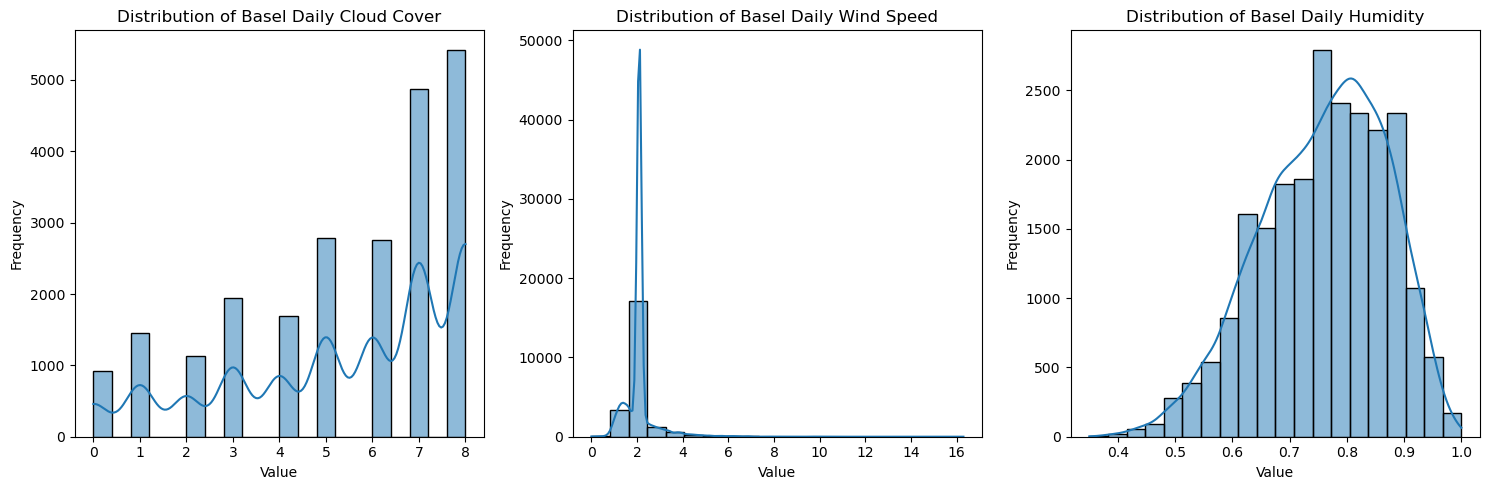

In [114]:
# Create the "plot grid" with a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 1 row, 3 columns

# Plot histograms for each specified column
sns.histplot(subset_df['BASEL_cloud_cover'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Basel Daily Cloud Cover')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

sns.histplot(subset_df['BASEL_wind_speed'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Basel Daily Wind Speed')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

sns.histplot(subset_df['BASEL_humidity'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Basel Daily Humidity')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout() #

# Display the plots
plt.show()

##### Comment: Humidity (r) approximates a Normal distribution, but Wind Speed (m) is right-skewed (fat tail to the right) while Cloud Cover (l) stair-steps higher, e.g. decidedly non-Normal.  Different scaling methods may be needed for each, but our Task 1.2 instructions are to apply z-score scaling to all variables chosen for scaling.

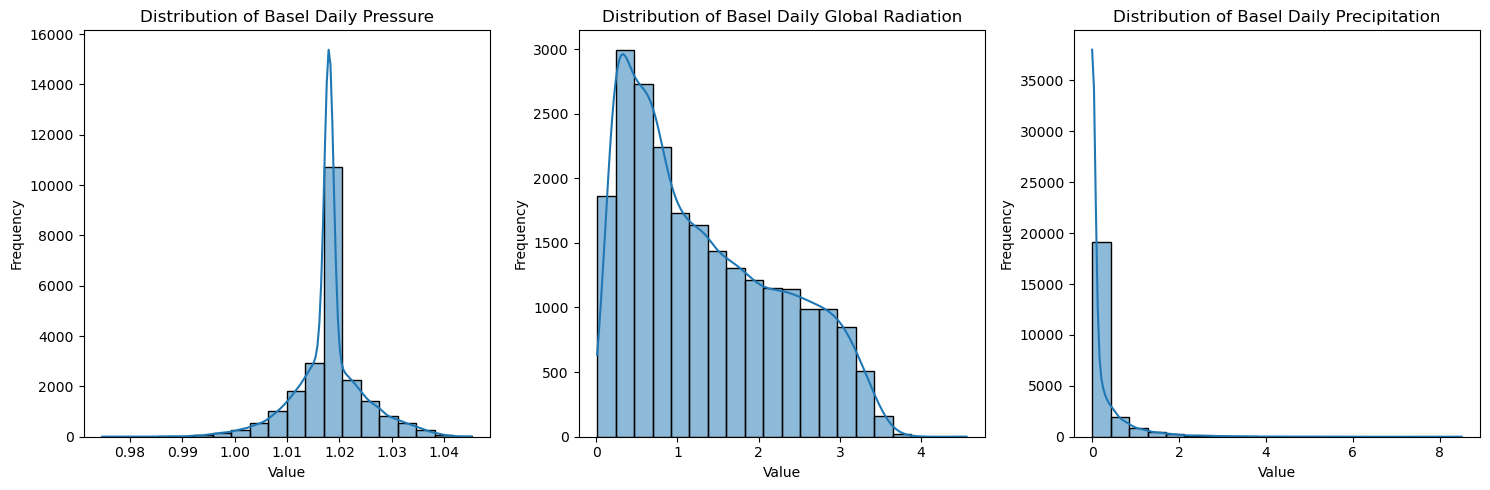

In [116]:
# Create the "plot grid" with a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 1 row, 3 columns

# Plot histograms for each specified column
sns.histplot(subset_df['BASEL_pressure'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Basel Daily Pressure')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

sns.histplot(subset_df['BASEL_global_radiation'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Basel Daily Global Radiation')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

sns.histplot(subset_df['BASEL_precipitation'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Basel Daily Precipitation')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout() #

# Display the plots
plt.show()

##### Comment: Pressure (l) is slightly Normal despite a very tall central value column, while Global Radiation (m) and Precipitation (r) have decidedly non-Normal frequency distributions.

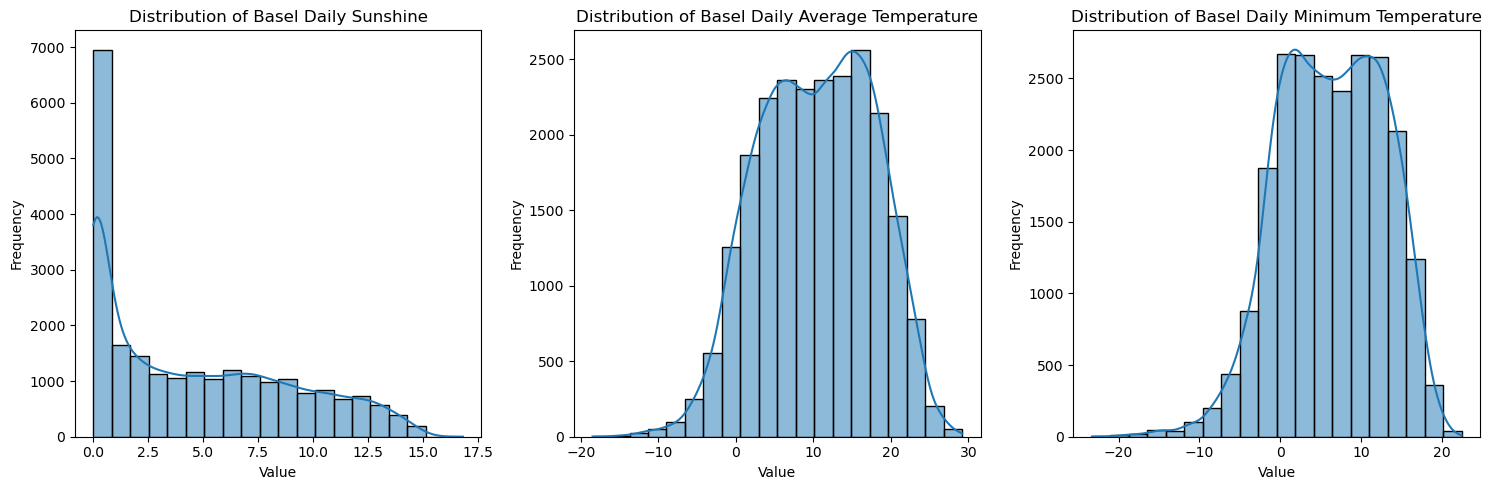

In [118]:
# Create the "plot grid" with a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 1 row, 3 columns

# Plot histograms for each specified column
sns.histplot(subset_df['BASEL_sunshine'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Basel Daily Sunshine')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

sns.histplot(subset_df['BASEL_temp_mean'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Basel Daily Average Temperature')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

sns.histplot(subset_df['BASEL_temp_min'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Basel Daily Minimum Temperature')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout() #

# Display the plots
plt.show()

##### Comment: Sunshine (l) is non-Normal, while Average Temperature (m) and Minimum Temperature (r) have Normal-approximating frequency distributions.

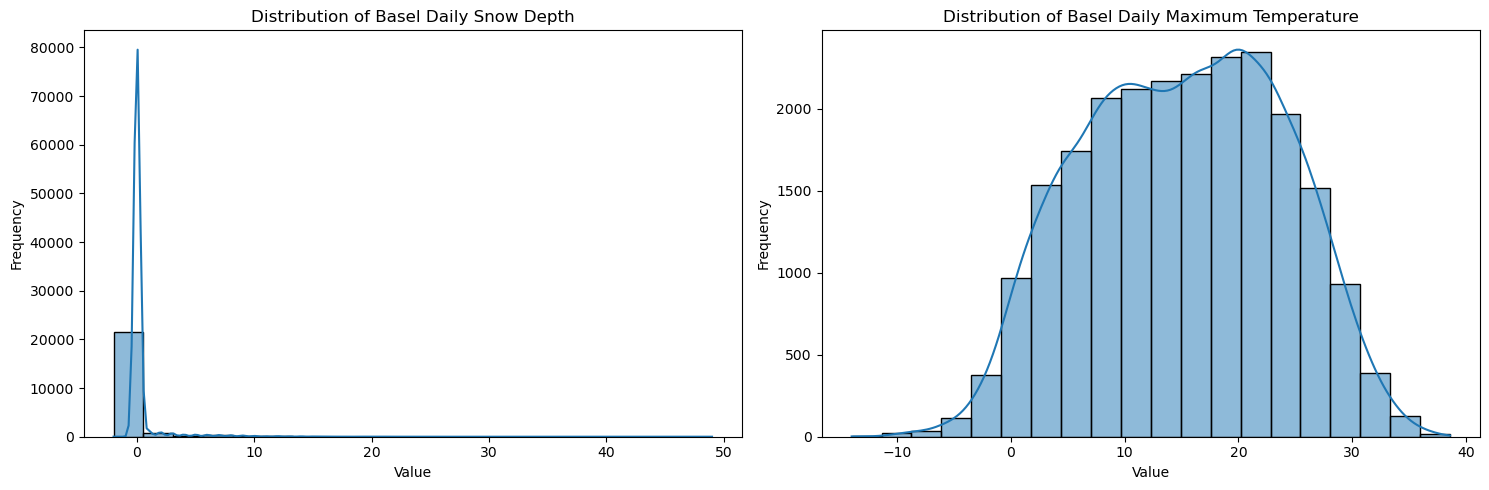

In [124]:
# Create the "plot grid" with a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # 1 row, 3 columns

# Plot histograms for each specified column
sns.histplot(subset_df['BASEL_snow_depth'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Basel Daily Snow Depth')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

sns.histplot(subset_df['BASEL_temp_max'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Basel Daily Maximum Temperature')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout() #

# Display the plots
plt.show()

##### Comment: Snow Depth (l) is non-Normal, showing a heavy right skew (fat-tailed to the right), while Maximum Temperature (r) is Normal-approximating.

### Scaling

### Comment: Task 1.2 instructions are to apply z-score method scaling to the numerical data, so that will be done here, despite non-Normal distributions for at least 6 of the 11 climate variables examined for a small sample of one city -- Basel, Switzerland.

In [128]:
# Create scaler object using StandardScaler from sklearn.preprocessing
# StandardScaler assumes data is normally distributed and scales with a distribution
# ... around 0 and standard deviation of 1. Scaling happens independently with each variable.
# As per the histograms above, some variables are non-Normal, thus z-score scaling may be problematic or ineffective for these

scaler = StandardScaler()

In [132]:
# Create new df with scaled data, then display first 3 rows

df_scaled = pd.DataFrame(scaler.fit_transform(subset_df), columns=subset_df.columns)
df_scaled.head(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078


In [136]:
df_scaled.tail(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453
22949,-0.170720,-0.02793,0.735760,0.196744,-0.005632,-0.004619,-0.179228,-0.322968,0.422023,0.549202,...,-0.443701,-0.081896,-0.003958,-0.00529,-0.00556,-0.024706,-0.018319,-0.007287,-0.00052,-0.00453


In [138]:
df_scaled.shape

(22950, 168)

In [140]:
# Compare scaled values slice with original slice
subset_df.head(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9


In [142]:
subset_df.tail(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22947,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,16.7,13.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,15.4,11.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22949,5,2.1,0.84,1.0193,1.34,0.22,0,3.2,13.5,9.9,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [148]:
# Spot-check whether z-score standardization proceeded as expected on the 'BASEL_wind_speed' variable
# The scaled variable mean should be 0 (or close to 0) and standard deviation 1 (or close to 1)

df_scaled['BASEL_wind_speed'].mean()

-8.817541226338847e-16

In [150]:
# Check the standard deviation (note: the ddof=0 argument tells Pandas to take the Population standard deviation)
# Pandas as a default uses the Sample standard deviation
df_scaled['BASEL_wind_speed'].std(ddof=0)

1.0000000000000402

##### Comment: The spot-check on one variable shows the z-score scaling yielded the expected mean and sdev (population) stats

### 04. Export scaled subset dataframe

In [154]:
df_scaled.to_pickle(os.path.join(path, 'euro_weather_scaled.pkl'))